### Установка scikit-learn

In [10]:
# !pip3 install scikit-learn

### Загрузка пакетов

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [2]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим переменные на целевую и независимые

In [3]:
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values
print(X)

[[128   1]
 [107   1]
 [137   0]
 ...
 [ 28   2]
 [184   2]
 [ 74   0]]


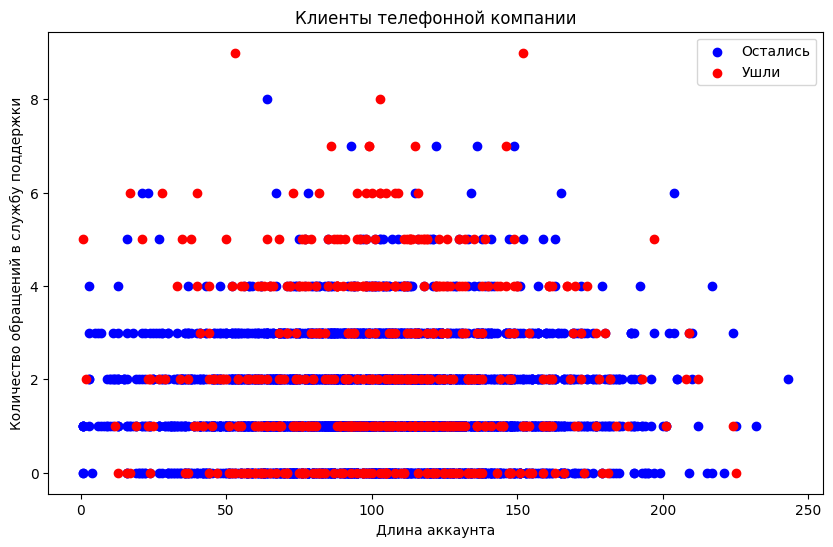

In [4]:
X = churn_df[['account_length', 'customer_service_calls']]
Y = churn_df['churn']
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0]['account_length'], X[Y == 0]['customer_service_calls'], color='blue', label='Остались')
plt.scatter(X[Y == 1]['account_length'], X[Y == 1]['customer_service_calls'], color='red', label='Ушли')
plt.xlabel('Длина аккаунта')
plt.ylabel('Количество обращений в службу поддержки')
plt.title('Клиенты телефонной компании')
plt.legend()
plt.show()

### Построение классификатора

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Создание набора для предсказания

In [6]:
X_new = np.array([
    [30, 17],
    [107, 24],
    [213, 10]
])

### Предсказание

In [7]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Разбитие данных

In [8]:
from sklearn.model_selection import train_test_split
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

### Обучение и предсказание

In [9]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8590704647676162


### Создание множеств соседей

In [15]:
neighbors = np.arange(1,20)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors)
print(train_accuracies)
print(test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
{np.int64(1): 1.0, np.int64(2): 0.8893473368342085, np.int64(3): 0.8998499624906227, np.int64(4): 0.8728432108027007, np.int64(5): 0.8788447111777945, np.int64(6): 0.8687171792948237, np.int64(7): 0.873218304576144, np.int64(8): 0.8630907726931732, np.int64(9): 0.867966991747937, np.int64(10): 0.8615903975993998, np.int64(11): 0.8645911477869468, np.int64(12): 0.859714928732183, np.int64(13): 0.8608402100525131, np.int64(14): 0.8593398349587397, np.int64(15): 0.8608402100525131, np.int64(16): 0.858589647411853, np.int64(17): 0.8604651162790697, np.int64(18): 0.8582145536384096, np.int64(19): 0.8589647411852963}
{np.int64(1): 0.800599700149925, np.int64(2): 0.8470764617691154, np.int64(3): 0.8425787106446777, np.int64(4): 0.856071964017991, np.int64(5): 0.8530734632683659, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8590704647676162, np.int64(9): 0.8605697151424287, np.int64(10): 0.8560719640

### Оценка модели от количества соседей

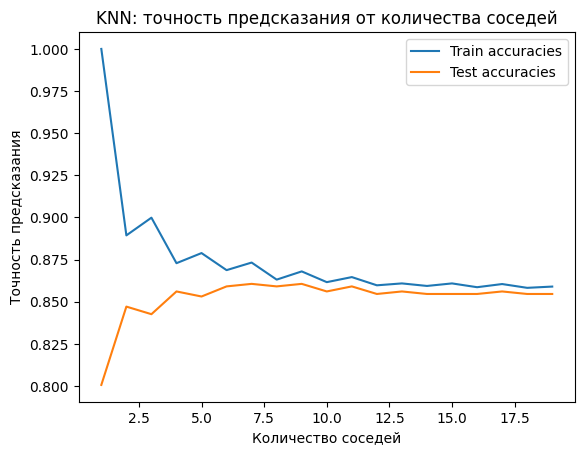

In [16]:
plt.title('KNN: точность предсказания от количества соседей')
plt.plot(neighbors, train_accuracies.values(), label = 'Train accuracies')
plt.plot(neighbors, test_accuracies.values(), label = 'Test accuracies')
plt.legend()
plt.xlabel('Количество соседей')
plt.ylabel('Точность предсказания')
plt.show()